INF 2178 - A2

Mingrui Fu 1010506551


In [2]:
from google.colab import drive
drive.mount('/drive',force_remount=True)

Mounted at /drive


step 1: import libraries and load dataset

In [3]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.formula.api import ols
import scipy.stats as stats
from statsmodels.stats.anova import anova_lm
from scipy.stats import shapiro, levene
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.multicomp import pairwise_tukeyhsd
%pip install bioinfokit
from bioinfokit.analys import stat

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.7/87.7 kB 3.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for bioinfokit: filename=bioinfokit-2.1.3-py3-none-any.whl size=59056 sha256=44631db68dc0f63c1a81a4c70758dd309853b164aa36c2c0fd651ac3a1bbf5fa
  Stored in directory: /root/.cache/pip/wheels/ac/67/a7/4e0b4172d5415933127e819d7d7080ae08a6220949ad2f6de5
Successfully built bioinfokit


In [4]:
# Load the dataset
data = pd.read_excel("/drive/My Drive/2178/INF2178_A2_data.xlsx",sheet_name='ChildCareCentres')

# Explore the dataset
data.head()

,_id,LOC_ID,LOC_NAME,AUSPICE,ADDRESS,PCODE,ward,bldg_type,BLDGNAME,IGSPACE,TGSPACE,PGSPACE,KGSPACE,SGSPACE,TOTSPACE,subsidy,cwelcc_flag
0,1,1013,Lakeshore Community Child Care Centre,Non Profit Agency,101 SEVENTH ST,M8V 3B5,3,Public Elementary School,Seventh Street Public School,0,20,32,52,60,164,Y,Y
1,2,1014,Alternative Primary School Parent Group,Non Profit Agency,1100 SPADINA RD,M5N 2M6,8,Public Elementary School,North Preparatory Public School,0,0,12,26,45,83,Y,Y
2,3,1015,Cardinal Leger Child Care Centre (Scarborough),Non Profit Agency,600 MORRISH RD,M1C 4Y1,25,Catholic Elementary School,Cardinal Leger Catholic School,0,10,16,26,50,102,Y,Y
3,4,1016,George Brown - Richmond Adelaide Childcare Centre,Non Profit Agency,130 ADELAIDE ST W,M5H 3P5,10,Other,NaN,10,15,40,0,0,65,Y,Y
4,5,1017,Woodland Nursery School (Warden Woods Communit...,Non Profit Agency,1 FIRVALLEY CRT,M1L 1N8,20,High Rise Apartment,NaN,0,10,16,0,0,26,Y,Y


step 2: data wrangling

In [5]:
# Display basic information about the dataset
data.info()

# Display summary statistics
print(data.describe())

# Check for missing values
print(data.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1063 entries, 0 to 1062
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   _id          1063 non-null   int64 
 1   LOC_ID       1063 non-null   int64 
 2   LOC_NAME     1063 non-null   object
 3   AUSPICE      1063 non-null   object
 4   ADDRESS      1063 non-null   object
 5   PCODE        1063 non-null   object
 6   ward         1063 non-null   int64 
 7   bldg_type    1063 non-null   object
 8   BLDGNAME     715 non-null    object
 9   IGSPACE      1063 non-null   int64 
 10  TGSPACE      1063 non-null   int64 
 11  PGSPACE      1063 non-null   int64 
 12  KGSPACE      1063 non-null   int64 
 13  SGSPACE      1063 non-null   int64 
 14  TOTSPACE     1063 non-null   int64 
 15  subsidy      1063 non-null   object
 16  cwelcc_flag  1063 non-null   object
dtypes: int64(9), object(8)
memory usage: 141.3+ KB
               _id        LOC_ID         ward      IGSPACE    

step 3:Quantitative Analysis Using One-way and Two-way ANOVAs

In [6]:
# Calculate proportions of each age group's capacity relative to total capacity
data['IGSPACE_prop'] = data['IGSPACE'] / data['TOTSPACE']
data['TGSPACE_prop'] = data['TGSPACE'] / data['TOTSPACE']
data['PGSPACE_prop'] = data['PGSPACE'] / data['TOTSPACE']
data['KGSPACE_prop'] = data['KGSPACE'] / data['TOTSPACE']
data['SGSPACE_prop'] = data['SGSPACE'] / data['TOTSPACE']

step 3.1: One-way ANOVA for auspice type

In [7]:
# One-way ANOVA for auspice type
model_auspice = ols('SGSPACE_prop ~ AUSPICE', data=data).fit()
anova_table_auspice = anova_lm(model_auspice, typ=2)
print("One-way ANOVA for auspice type:")
print(anova_table_auspice)


One-way ANOVA for auspice type:
             sum_sq      df           F        PR(>F)
AUSPICE   14.428900     2.0  107.676247  2.679685e-43
Residual  71.021393  1060.0         NaN           NaN


In [15]:
# ANOVA table
res = stat()
res.anova_stat(df=data, res_var='SGSPACE_prop', anova_model='SGSPACE_prop ~ AUSPICE')
res.anova_summary

,df,sum_sq,mean_sq,F,PR(>F)
AUSPICE,2.0,14.428900,7.214450,107.676247,2.679685e-43
Residual,1060.0,71.021393,0.067001,NaN,NaN


In [9]:
#post hoc test using Tukey's HSD for auspice type
res = stat()
res.tukey_hsd(df=data, res_var='SGSPACE_prop', xfac_var='AUSPICE', anova_model='SGSPACE_prop ~ AUSPICE')
res.tukey_summary

/usr/local/lib/python3.10/dist-packages/bioinfokit/analys.py:421: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mult_group[ele] = df[df[xfac_var] == ele].mean().loc[res_var]
/usr/local/lib/python3.10/dist-packages/bioinfokit/analys.py:421: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mult_group[ele] = df[df[xfac_var] == ele].mean().loc[res_var]
/usr/local/lib/python3.10/dist-packages/bioinfokit/analys.py:421: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to 

,group1,group2,Diff,Lower,Upper,q-value,p-value
0,Non Profit Agency,Commercial Agency,0.249883,0.181514,0.318252,12.139973,0.001000
1,Non Profit Agency,Public (City Operated) Agency,0.336859,0.190098,0.483620,7.623894,0.001000
2,Commercial Agency,Public (City Operated) Agency,0.086976,-0.070506,0.244458,1.834451,0.398791


In [10]:
# Post-hoc tests for auspice type
tukey_results_auspice = pairwise_tukeyhsd(data['SGSPACE_prop'], data['AUSPICE'])
print("\nPost-hoc tests for auspice type:")
print(tukey_results_auspice)


Post-hoc tests for auspice type:
                 Multiple Comparison of Means - Tukey HSD, FWER=0.05                 
      group1                  group2            meandiff p-adj   lower  upper  reject
-------------------------------------------------------------------------------------
Commercial Agency             Non Profit Agency   0.2377    0.0  0.1968 0.2786   True
Commercial Agency Public (City Operated) Agency  -0.0662 0.2875 -0.1692 0.0368  False
Non Profit Agency Public (City Operated) Agency  -0.3039    0.0 -0.4038 -0.204   True
-------------------------------------------------------------------------------------


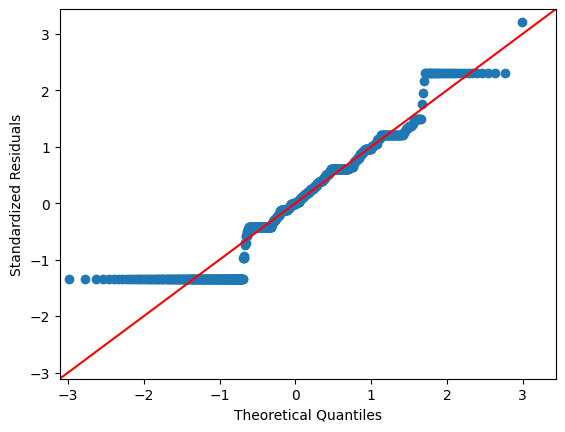

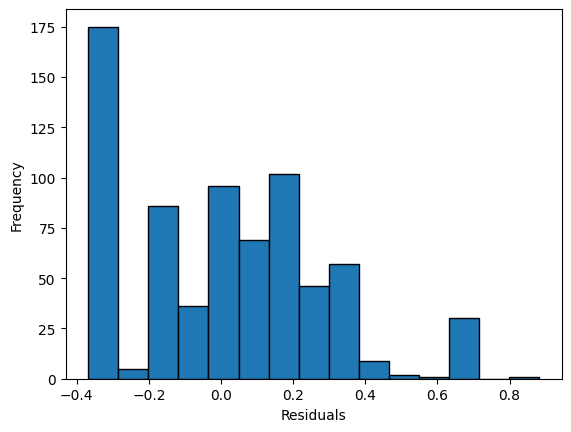

In [11]:
#checking model diagnostics
import statsmodels.api as sm
import matplotlib.pyplot as plt

# assumption 1: res.anova_std_residuals are standardized residuals obtained from ANOVA (check above)
sm.qqplot(res.anova_std_residuals, line='45')
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Standardized Residuals")
plt.show()

# histogram
plt.hist(res.anova_model_out.resid, bins='auto', histtype='bar', ec='k')
plt.xlabel("Residuals")
plt.ylabel('Frequency')
plt.show()

In [12]:
# Assumption testing for one-way ANOVA
# Normality of residuals
w, pvalue = stats.shapiro(model_auspice.resid)
print(w,pvalue)
'''The p-value is very close to 0, indicating strong evidence against the null hypothesis. Therefore, we reject the null hypothesis and conclude that the residuals are not normally distributed.'''

0.9172825217247009 1.1933461789294647e-23


'The p-value is very close to 0, indicating strong evidence against the null hypothesis. Therefore, we reject the null hypothesis and conclude that the residuals are not normally distributed.'

In [13]:
#assumption 2: variances are homogenous: Levene's test when the sample is not normally distributed
res.levene(df=data, res_var='SGSPACE_prop', xfac_var='AUSPICE')
res.levene_summary

,Parameter,Value
0,Test statistics (W),33.525
1,Degrees of freedom (Df),2.000
2,p value,0.000


step 3.2: Two-way ANOVA for auspice type and cwelcc_flag availability

<Axes: xlabel='AUSPICE', ylabel='SGSPACE_prop'>

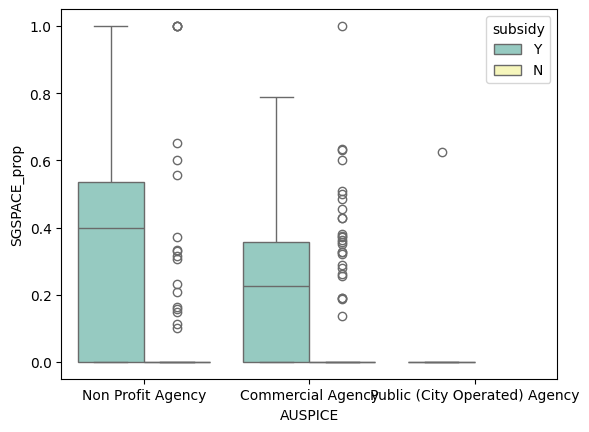

In [14]:
sns.boxplot(x="AUSPICE", y="SGSPACE_prop", hue="subsidy",data=data, palette="Set3")

In [59]:
# Two-way ANOVA for auspice type and cwelcc_flag availability
model=ols('SGSPACE_prop ~ AUSPICE + cwelcc_flag + AUSPICE:cwelcc_flag', data=data).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:1896: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 2, but rank is 1
  warnings.warn('covariance of constraints does not have full '


,sum_sq,df,F,PR(>F)
AUSPICE,24.401074,2.0,183.306491,1.240295e-38
cwelcc_flag,0.367918,1.0,5.527776,1.889960e-02
AUSPICE:cwelcc_flag,0.387333,2.0,2.909734,5.492644e-02
Residual,70.418500,1058.0,NaN,NaN


In [60]:
res = stat()
res.anova_stat(df=data, res_var='SGSPACE_prop', anova_model='SGSPACE_prop ~ AUSPICE + cwelcc_flag + AUSPICE:cwelcc_flag')
res.anova_summary

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:1896: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 2, but rank is 1
  warnings.warn('covariance of constraints does not have full '


,df,sum_sq,mean_sq,F,PR(>F)
AUSPICE,2.0,24.401074,12.200537,183.306491,1.240295e-38
cwelcc_flag,1.0,0.367918,0.367918,5.527776,1.889960e-02
AUSPICE:cwelcc_flag,2.0,0.387333,0.193666,2.909734,5.492644e-02
Residual,1058.0,70.418500,0.066558,NaN,NaN


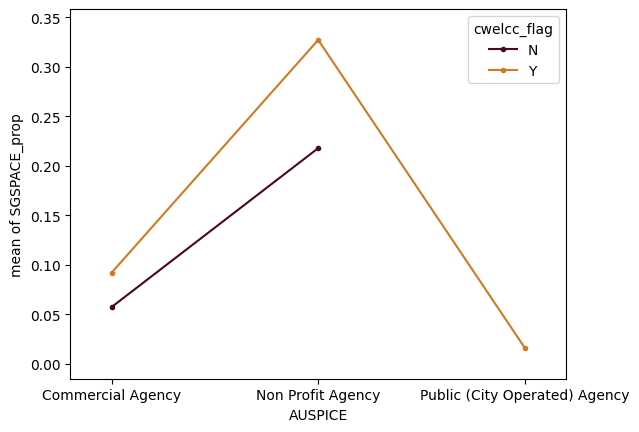

In [61]:
# Interaction plot for auspice type and cwelcc_flag availability
from statsmodels.graphics.factorplots import interaction_plot
import matplotlib.pyplot as plt
fig = interaction_plot(x=data['AUSPICE'],trace=data['cwelcc_flag'],response=data['SGSPACE_prop'],colors=['#4c061d','#d17a22'])
plt.show()

In [62]:
# Post-hoc tests for interaction between auspice type and cwelcc_flag availability
res.tukey_hsd(df=data, res_var='SGSPACE_prop',xfac_var='AUSPICE',anova_model='SGSPACE_prop ~ C(AUSPICE) + C(cwelcc_flag) + C(AUSPICE):C(cwelcc_flag)')
res.tukey_summary

/usr/local/lib/python3.10/dist-packages/bioinfokit/analys.py:421: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mult_group[ele] = df[df[xfac_var] == ele].mean().loc[res_var]
/usr/local/lib/python3.10/dist-packages/bioinfokit/analys.py:421: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mult_group[ele] = df[df[xfac_var] == ele].mean().loc[res_var]
/usr/local/lib/python3.10/dist-packages/bioinfokit/analys.py:421: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to 

,group1,group2,Diff,Lower,Upper,q-value,p-value
0,Non Profit Agency,Commercial Agency,0.249883,0.181457,0.318308,12.129985,0.0010
1,Non Profit Agency,Public (City Operated) Agency,0.336859,0.189976,0.483741,7.617621,0.0010
2,Commercial Agency,Public (City Operated) Agency,0.086976,-0.070637,0.244589,1.832942,0.3994


In [63]:
res.tukey_hsd(df=data, res_var='SGSPACE_prop',xfac_var='cwelcc_flag',anova_model='SGSPACE_prop ~ C(AUSPICE) + C(cwelcc_flag) + C(AUSPICE):C(cwelcc_flag)')
res.tukey_summary

/usr/local/lib/python3.10/dist-packages/bioinfokit/analys.py:421: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mult_group[ele] = df[df[xfac_var] == ele].mean().loc[res_var]
/usr/local/lib/python3.10/dist-packages/bioinfokit/analys.py:421: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mult_group[ele] = df[df[xfac_var] == ele].mean().loc[res_var]


,group1,group2,Diff,Lower,Upper,q-value,p-value
0,Y,N,0.12312,0.05287,0.19337,4.866142,0.001


In [64]:
res.tukey_hsd(df=data,res_var='SGSPACE_prop',xfac_var=['AUSPICE','cwelcc_flag'], anova_model='SGSPACE_prop ~ AUSPICE + cwelcc_flag + AUSPICE:cwelcc_flag')
res.tukey_summary.head()

/usr/local/lib/python3.10/dist-packages/bioinfokit/analys.py:388: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  (df[xfac_var[1]] == ele2)].mean().loc[res_var]
/usr/local/lib/python3.10/dist-packages/bioinfokit/analys.py:388: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  (df[xfac_var[1]] == ele2)].mean().loc[res_var]
/usr/local/lib/python3.10/dist-packages/bioinfokit/analys.py:388: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying

,group1,group2,Diff,Lower,Upper,q-value,p-value
0,"(Non Profit Agency, Y)","(Non Profit Agency, N)",0.039925,-0.105100,0.184951,1.112512,0.900
1,"(Non Profit Agency, Y)","(Commercial Agency, Y)",0.243469,0.144445,0.342493,9.935829,0.001
2,"(Non Profit Agency, Y)","(Commercial Agency, N)",0.269755,0.130924,0.408586,7.852044,0.001
3,"(Non Profit Agency, Y)","(Public (City Operated) Agency, Y)",0.338957,0.160092,0.517821,7.658100,0.001
4,"(Non Profit Agency, Y)","(Public (City Operated) Agency, N)",0.000000,-inf,inf,0.000000,0.900


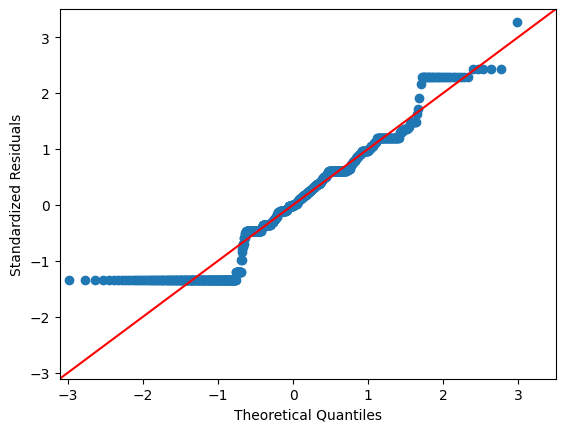

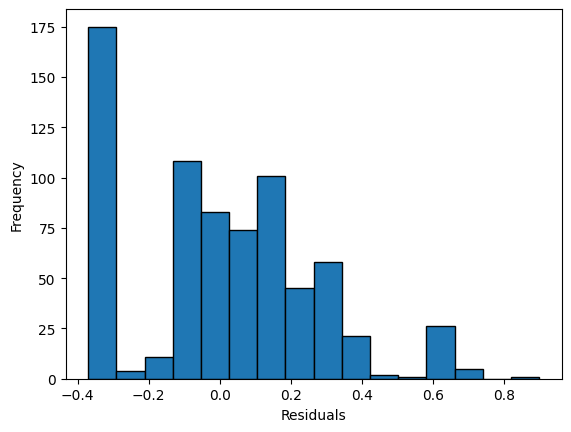

In [65]:
#checking model diagnostics
import statsmodels.api as sm
import matplotlib.pyplot as plt

# assumption 1: res.anova_std_residuals are standardized residuals obtained from ANOVA (check above)
sm.qqplot(res.anova_std_residuals, line='45')
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Standardized Residuals")
plt.show()

# histogram
plt.hist(res.anova_model_out.resid, bins='auto', histtype='bar', ec='k')
plt.xlabel("Residuals")
plt.ylabel('Frequency')
plt.show()

In [68]:
# Assumption testing for two-way ANOVA
# Normality of residuals
w, pvalue = stats.shapiro(model.resid)
print(w,pvalue)

0.9284662008285522 4.2015908161452954e-22


In [69]:
#assumption 2: variances are homogenous: Levene's test when the sample is not normally distributed
res.levene(df=data, res_var='SGSPACE_prop', xfac_var=['AUSPICE','cwelcc_flag'])
res.levene_summary

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


,Parameter,Value
0,Test statistics (W),NaN
1,Degrees of freedom (Df),5.0
2,p value,NaN
